In [1]:
import numpy as np
import matplotlib.pyplot as pl

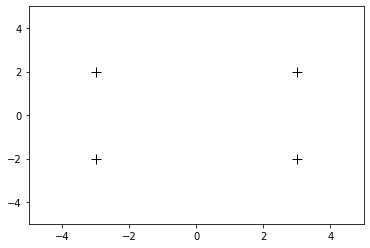

In [2]:
# Setting up initial conditions (vortex centres and circulation)

# Vortex rings
y_v = np.array([2,-2,2,-2]) # x position of first, second, third and fourth vortices
x_v = np.array([-3,-3,3,3]) # y position of first, second, third and fourth vortices
a = 4
k_v = np.array([a, a, a, a]) #line vortex constant k of 4 vortices, all vortex constant will be set equal
# the first vortex position is labelled by x_v[0], y_v[0]
# the second vortex position is labelled by x_v[1], y_v[1]
# the third vortex position is labelled by x_v[2], y_v[2]
# the fourth vortex position is labelled by x_v[3], y_v[3]

# Setting up the plot
pl.ion() 
fig , ax = pl.subplots(1,1)
# mark the initial positions of vortices
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
p , = ax.plot(x_v , y_v , 'k+' , markersize = 10)

In [3]:
# draw the initial velocity streamline
ngrid = 10 # insert the dimension of your simulation grid
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j] # these are 3600 by 3600 arrays
#360 j sets the resolution of the cartesian grid ; play around with it as you see fit

# filling a 3600 by 3600 array with zeroes
vel_x = np.zeros(np.shape(Y)) # this holds x-velocity
vel_y = np.zeros(np.shape(Y)) # this holds y-velocity

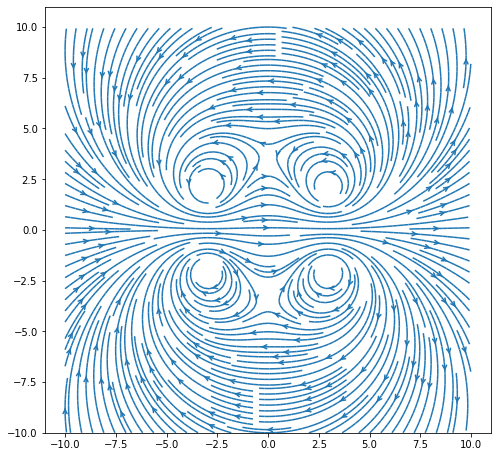

In [4]:
# choosing the size of the simulation grid
ngrid = 10
# defining the X and Y grid
Y, X = np.mgrid[-ngrid:ngrid:100j, -ngrid:ngrid:100j]

# these are the distances of each point from each of the 4 vortices
R0 = np.sqrt((X-x_v[0])**2 + (Y-y_v[0])**2)
R1 = np.sqrt((X-x_v[1])**2 + (Y-y_v[1])**2)
R2 = np.sqrt((X-x_v[2])**2 + (Y-y_v[2])**2)
R3 = np.sqrt((X-x_v[3])**2 + (Y-y_v[3])**2)

# these are the polar angles of each point relative to each vortex
# we need the function np.arctan2 to map every point to an angle ranging from 0 to 2pi
PHI0 = np.arctan2((Y-y_v[0]), (X-x_v[0]))
PHI1 = np.arctan2((Y-y_v[1]), (X-x_v[1]))
PHI2 = np.arctan2((Y-y_v[2]), (X-x_v[2]))
PHI3 = np.arctan2((Y-y_v[3]), (X-x_v[3]))

# the magnitude of the velocity field for the vortex scales as k/r
u_phi0 = k_v[0]/np.sqrt(((X-x_v[0])**2+(Y-y_v[0])**2)) 
u_phi1 = k_v[1]/np.sqrt(((X-x_v[1])**2+(Y-y_v[1])**2)) 
u_phi2 = k_v[2]/np.sqrt(((X-x_v[2])**2+(Y-y_v[2])**2)) 
u_phi3 = k_v[3]/np.sqrt(((X-x_v[3])**2+(Y-y_v[3])**2)) 

# the total velocity field with a direction at every point in the simualtion grid
# the direction for the two upper vortices are in the in the \hat{\phi} direction
# this is denoted by using -\sin(\phi)\hat{x} + \cos(\phi)\hat{y}
# the direction for the two lower vortices are in the in the -\hat{\phi} direction
# this is denoted by using \sin(\phi)\hat{x} - \cos(\phi)\hat{y}
vel_x = -u_phi0*np.sin(PHI0) + u_phi1*np.sin(PHI1) - u_phi2*np.sin(PHI2) + u_phi3*np.sin(PHI3)
vel_y = u_phi0*np.cos(PHI0) - u_phi1*np.cos(PHI1) + u_phi2*np.cos(PHI2) -  u_phi3*np.cos(PHI3)

# masking radius for better visualization of the vortex centres
# choosing a reasonable size compared to the size ngrid of the simulation grid 
r_mask = 0.5 # insert radius of the mask around the vortex centres
# within this mask , you will not plot any streamline
# so that you can see more clearly the movement of the vortex centres

# do not draw the streamlines at a distance less than r_mask of every vortex
vel_x[R0<r_mask] = np.nan
vel_y[R0<r_mask] = np.nan
vel_x[R1<r_mask] = np.nan
vel_y[R1<r_mask] = np.nan
vel_x[R2<r_mask] = np.nan
vel_y[R2<r_mask] = np.nan
vel_x[R3<r_mask] = np.nan
vel_y[R3<r_mask] = np.nan

#adjusting the figure size
fig = pl.figure(figsize = (8,8))

# set up boundaries of the simulation box
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])

# initial plot of the streamlines
pl.streamplot(X, Y, vel_x, vel_y, density=2.5, arrowstyle='->')
pl.axis("image")

pl.show()

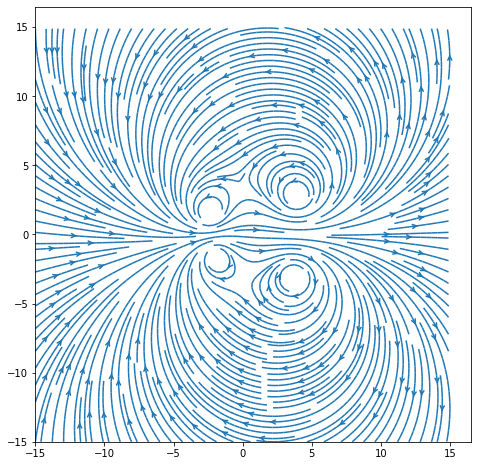

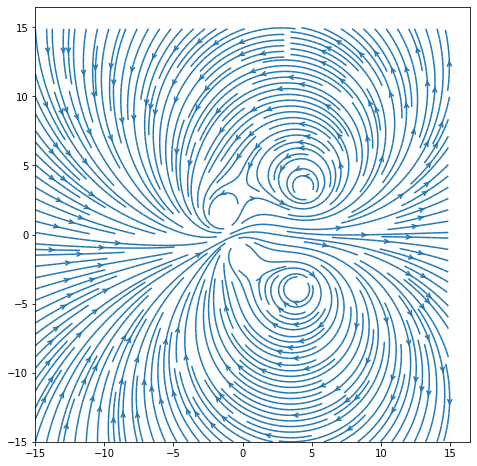

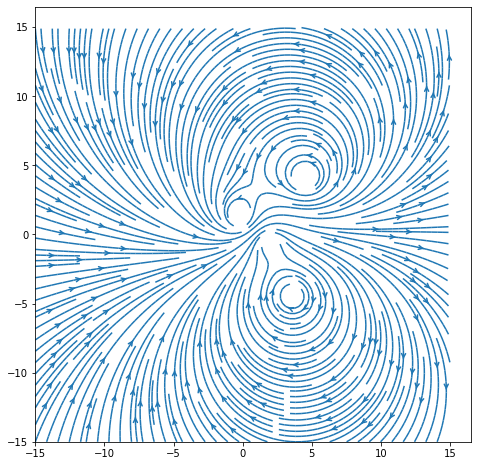

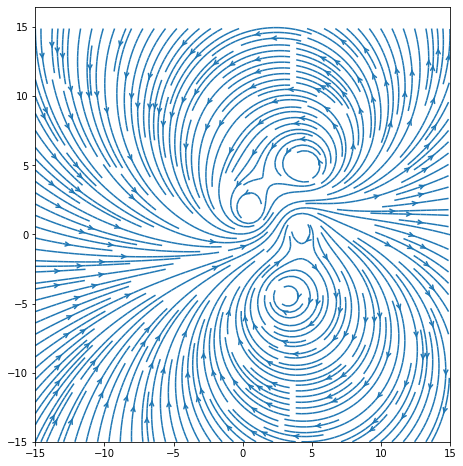

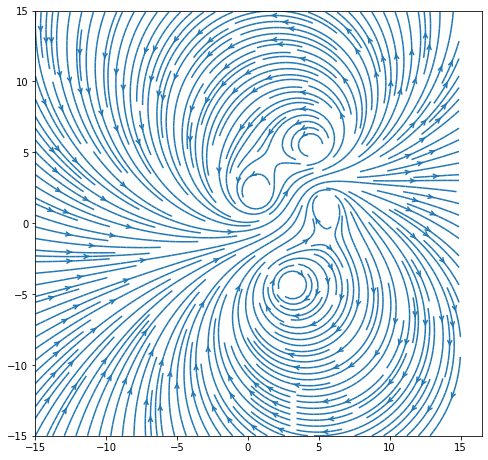

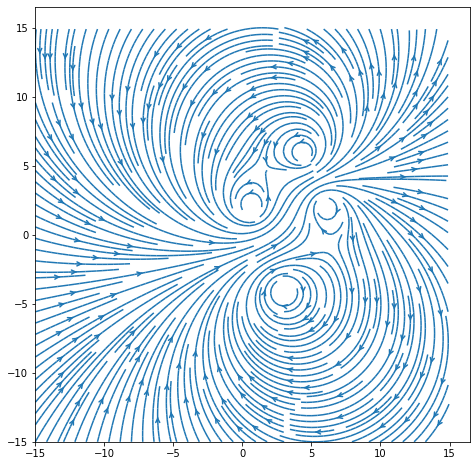

KeyboardInterrupt: 

In [5]:
# creating a loop to compute the new positions and streamlines as time moves forward
fig.canvas.draw()

y_vinitial = np.array([2,-2,2,-2]) 
y_v = np.array([2,-2,2,-2]) # x position of first, second, third and fourth vortices
y_v0 = y_v[0]
y_v1 = y_v[1]
y_v2 = y_v[2]
y_v3 = y_v[3]

x_vinitial = np.array([-3,-3,3,3]) 
x_v = np.array([-3,-3,3,3]) # y position of first, second, third and fourth vortices
x_v0 = x_v[0]
x_v1 = x_v[1]
x_v2 = x_v[2]
x_v3 = x_v[3]

# the first vortex position is labelled by x_v[0], y_v[0]
# the second vortex position is labelled by x_v[1], y_v[1]
# the third vortex position is labelled by x_v[2], y_v[2]
# the fourth vortex position is labelled by x_v[3], y_v[3]

a = 4 # choosing a strength that is of the same order as the initial positions
k_v = np.array([a, a, a, a]) #line vortex constant k of 4 vortices, all vortex constants will be set equal

# the code will take few minutes to work due to the small step size dt and the large number of steps Nsteps required
dt = 1 # step size, a small step size increases the precision of the displacement of the vortex
            # a smaller step size will take a longer computing time to show a net change in the positions
Nsteps = 4
count = 1 # start at 1 to skip the division by zero of count/count in the loop below
# use count/count such that the time step is always 1 multiplied by dt

while count <= Nsteps:
    # assuming a vortex only feels the velocity field of its two nearest neighbors
    # the effect of the third neighbor is assumed to be masked by the two nearest neighbors
    # note that the loop does not evolve the positions of all vortices simultaneously
    # the position of the vortex 0 is calculated first
    # then the position of vortex 1 depends on the new position of vortex 0, but on the old position of vortex 2 and 3
    # the calculated positions of vortices 1, 2 and 3 may become less accurate over many steps

    # calculating the new position of vortex 0
    
        # the angle of vortex 0 relative to vortex 1 and 2
    PHI1 = np.arctan2((y_v0-y_v1), (x_v0-x_v1))
    PHI2 = np.arctan2((y_v0-y_v1), (x_v0-x_v2))

        # the magnitude of the velocity field at the position of vortex 0
    u_PHI1 = k_v[1]/np.sqrt(((x_v0-x_v1)**2+(y_v0-y_v1)**2)) 
    u_PHI2 = k_v[2]/np.sqrt(((x_v0-x_v2)**2+(y_v0-y_v2)**2)) 
    
        # this is where the loop changes the x and y position of a vortex 
        # the new position at time t is equal to x(t) = x(t-1) + u(t-1)*dt  
    x_v0 = x_v0 + (u_PHI1*np.sin(PHI1) - u_PHI2*np.sin(PHI2))*dt*(count/count)
    y_v0 = y_v0 + (-u_PHI1*np.cos(PHI1) + u_PHI2*np.cos(PHI2))*dt*(count/count)
    
    # calculating the new position of vortex 1
    
        # the angle of vortex 1 relative to vortex 0 and 3
    PHI0 = np.arctan2((y_v1-y_v0), (x_v1-x_v0))
    PHI3 = np.arctan2((y_v1-y_v3), (x_v1-x_v3))
        
        # the magnitude of the velocity field at the position of vortex 1
    u_PHI0 = k_v[0]/np.sqrt(((x_v1-x_v0)**2+(y_v1-y_v0)**2)) 
    u_PHI3 = k_v[3]/np.sqrt(((x_v1-x_v3)**2+(y_v1-y_v3)**2)) 
    
        # this is where the loop changes the x and y position of a vortex 
        # the new position at time t is equal to x(t) = x(t-1) + u(t-1)*dt
    x_v1 = x_v1 + (-u_PHI0*np.sin(PHI0) + u_PHI3*np.sin(PHI3))*dt*(count/count)
    y_v1 = y_v1 + (u_PHI0*np.cos(PHI0) - u_PHI3*np.cos(PHI3))*dt*(count/count)
    
    # calculating the new position of vortex 2
    
        # the angle of vortex 2 relative to vortex 0 and 3
    PHI0 = np.arctan2((y_v2-y_v0), (x_v2-x_v0))
    PHI3 = np.arctan2((y_v2-y_v3), (x_v2-x_v3))

        # the magnitude of the velocity field at the position of vortex 2
    u_PHI0 = k_v[0]/np.sqrt(((x_v2-x_v0)**2+(y_v2-y_v0)**2)) 
    u_PHI3 = k_v[3]/np.sqrt(((x_v2-x_v3)**2+(y_v2-y_v3)**2)) 

        # this is where the loop changes the x and y position of a vortex 
        # the new position at time t is equal to x(t) = x(t-1) + u(t-1)*dt
    x_v2 = x_v2 + (-u_PHI0*np.sin(PHI0) + u_PHI3*np.sin(PHI3))*dt*(count/count)
    y_v2 = y_v2 + (u_PHI0*np.cos(PHI0) - u_PHI3*np.cos(PHI3))*dt*(count/count)
    
    # calculating the new position of vortex 3
    
        # the angle of vortex 3 relative to vortex 1 and 2
    PHI1 = np.arctan2((y_v3-y_v1), (x_v3-x_v1))
    PHI2 = np.arctan2((y_v3-y_v2), (x_v3-x_v2))

        # the magnitude of the velocity field at the position of vortex 3
    u_PHI1 = k_v[1]/np.sqrt(((x_v3-x_v1)**2+(y_v3-y_v1)**2)) 
    u_PHI2 = k_v[2]/np.sqrt(((x_v3-x_v2)**2+(y_v3-y_v2)**2)) 

        # this is where the loop changes the x and y position of a vortex 
        # the new position at time t is equal to x(t) = x(t-1) + u(t-1)*dt
    x_v3 = x_v3 + (u_PHI1*np.sin(PHI1) - u_PHI2*np.sin(PHI2))*dt*(count/count)
    y_v3 = y_v3 + (-u_PHI1*np.cos(PHI1) + u_PHI2*np.cos(PHI2))*dt*(count/count)

    # the new positions are
    x_v = np.array([x_v0, x_v1, x_v2, x_v3])
    y_v = np.array([y_v0, y_v1, y_v2, y_v3])
    
    # plotting the new streamlines 

    # choosing the size of the simulation grid
    ngrid = 15
    # defining the X and Y grid
    Y, X = np.mgrid[-ngrid:ngrid:100j, -ngrid:ngrid:100j]

    # these are the distances of each point on the grid from each of the 4 vortices with new positions
    R0 = np.sqrt((X-x_v0)**2 + (Y-y_v0)**2)
    R1 = np.sqrt((X-x_v1)**2 + (Y-y_v1)**2)
    R2 = np.sqrt((X-x_v2)**2 + (Y-y_v2)**2)
    R3 = np.sqrt((X-x_v3)**2 + (Y-y_v3)**2)

    # these are the polar angles of each point on the grid relative to each vortex
    # we need the function np.arctan2 to map every point to an angle ranging from 0 to 2pi
    phi0 = np.arctan2((Y-y_v0), (X-x_v0))
    phi1 = np.arctan2((Y-y_v1), (X-x_v1))
    phi2 = np.arctan2((Y-y_v2), (X-x_v2))
    phi3 = np.arctan2((Y-y_v3), (X-x_v3))

    # the magnitude of the velocity field for the vortex scales as k/r
    # these are the new velocity fields for each vortex
    u_phi0 = k_v[0]/np.sqrt(((X-x_v0)**2+(Y-y_v0)**2)) 
    u_phi1 = k_v[1]/np.sqrt(((X-x_v1)**2+(Y-y_v1)**2)) 
    u_phi2 = k_v[2]/np.sqrt(((X-x_v2)**2+(Y-y_v2)**2)) 
    u_phi3 = k_v[3]/np.sqrt(((X-x_v3)**2+(Y-y_v3)**2)) 

    # the total velocity field with a direction at every point in the simualtion grid
        # the direction for the two upper vortices (0 and 2) are in the in the \hat{\phi} direction
        # this is denoted by using -\sin(\phi)\hat{x} + \cos(\phi)\hat{y}
        # the direction for the two lower vortices (1 and 3) are in the in the -\hat{\phi} direction
        # this is denoted by using \sin(\phi)\hat{x} - \cos(\phi)\hat{y}
    vel_x = -u_phi0*np.sin(phi0) + u_phi1*np.sin(phi1) - u_phi2*np.sin(phi2) + u_phi3*np.sin(phi3)
    vel_y = u_phi0*np.cos(phi0) - u_phi1*np.cos(phi1) + u_phi2*np.cos(phi2) -  u_phi3*np.cos(phi3)

    # masking radius for better visualization of the vortex centres
        # choosing a reasonable size compared to the size ngrid of the simulation grid 
        # within this mask , you will not plot any streamline
        # so that you can see more clearly the movement of the vortex centres
    r_mask = 0.5 
   
    # do not draw the streamlines at a distance less than r_mask of every vortex
    vel_x[R0<r_mask] = np.nan
    vel_y[R0<r_mask] = np.nan
    vel_x[R1<r_mask] = np.nan
    vel_y[R1<r_mask] = np.nan
    vel_x[R2<r_mask] = np.nan
    vel_y[R2<r_mask] = np.nan
    vel_x[R3<r_mask] = np.nan
    vel_y[R3<r_mask] = np.nan

    #adjusting the figure size
    fig = pl.figure(figsize = (8,8))

    # set up boundaries of the simulation box
    ax.set_xlim([-ngrid, ngrid])
    ax.set_ylim([-ngrid, ngrid])

    # streamplots
    pl.streamplot(X, Y, vel_x, vel_y, density=2.5, arrowstyle='->')
    pl.axis("image")
    pl.show()

count += 1

# to obtain better results, we must find the optimal choice of: 
    # dt, Nsteps, vortex constant k and possibly the initial positions
    
# the plots show that the rear vortex passes through the front one
# however it does not do so by staying parallel to the horizontal axis